In [ ]:
import os
import random
from dotenv import load_dotenv
load_dotenv()

ML_Summer_School_ID = os.getenv('ML_Summer_School_ID')
print("Your Sudent ID is: " + ML_Summer_School_ID)

Your Sudent ID is: THS


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
from PIL import Image
import cv2
import shutil

In [4]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [5]:
file_dir = ['fruits/Kiwi','fruits/Pear','fruits/Watermelon']
images = []
file_list = []

for cur_class in file_dir:
    
    for cur_file in os.listdir(cur_class):
        read_path = cur_class+"/"+cur_file
        img = cv2.imread(read_path)
        img = cv2.resize(img,(224,224))

        images.append(img)
        file_list.append(read_path)

images= np.array(images)
file_list = np.array(file_list)

In [6]:
print("Images shape: ",images.shape)
print("File list shape: ",file_list.shape)

Images shape:  (1401, 224, 224, 3)
File list shape:  (1401,)


In [7]:
224*224

50176

## Feature Generate using pretrain model

In [8]:
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
features = predictions.reshape(images.shape[0], -1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step


In [10]:
print("Features shape", features.shape)

Features shape (1401, 62720)


## Train K-Means Clusting

In [11]:
#Train K-Means Clusting

k = 4
kmodel = KMeans(n_clusters=k, random_state=728)
kmodel.fit(features)


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,728
,copy_x,True
,algorithm,'lloyd'


## Test Model

In [12]:
#Load test images
test_path = "fruits/testset"
test_images = []
test_files = []


for cur_file in os.listdir(test_path):
    read_path = test_path+"/"+cur_file
    img = cv2.imread(read_path)
    img = cv2.resize(img,(224,224))

    test_images.append(img)
    test_files.append(read_path)
    
test_images = np.array(test_images)
test_files = np.array(test_files)

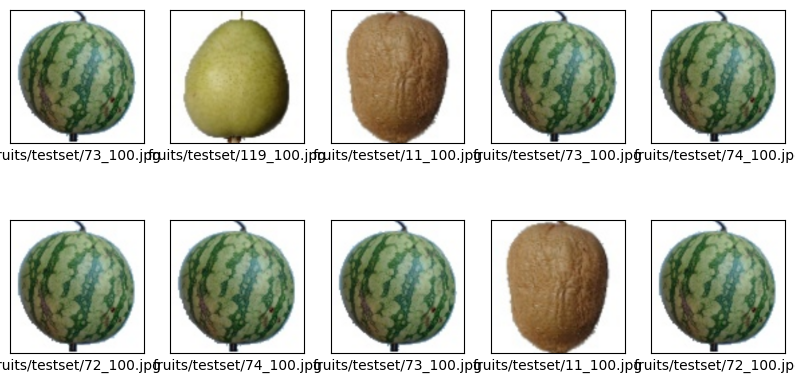

In [14]:
plt.figure(figsize=(10,5))
random_inds = np.random.choice(range(len(test_images)),10)

for i,img_i in enumerate(random_inds):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    show_image = cv2.cvtColor(test_images[img_i],cv2.COLOR_BGR2RGB)
    plt.imshow(np.squeeze(show_image))
    plt.xlabel(test_files[img_i])


In [15]:
print("test_images shape: ",test_images.shape)
print("test_files list shape: ",test_files.shape)

test_images shape:  (12, 224, 224, 3)
test_files list shape:  (12,)


In [17]:
#Generate features from test set
test_predictions = model.predict(test_images.reshape(-1, 224, 224, 3))


test_features = test_predictions.reshape(test_images.shape[0], -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [18]:
# Cluter the the features
kpredictions = kmodel.predict(test_features)
kpredictions

array([2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0], dtype=int32)

In [19]:
root_path = f"{os.getcwd()}/{ML_Summer_School_ID}"
os.mkdir(root_path)


kiwi_path = root_path+"/Kiwi"
pear_path = root_path+"/Pear"
watermelon_path = root_path+"/Watermelon"
other_path =root_path+"/others"



os.mkdir(kiwi_path)
os.mkdir(pear_path)
os.mkdir(watermelon_path)
os.mkdir(other_path)


In [20]:
import cv2
for i,img in enumerate(test_images):
 
    if kpredictions[i] == 1:
        cv2.imwrite(kiwi_path+"/"+str(i)+".jpg",img)
    elif kpredictions[i] == 2:
        cv2.imwrite(pear_path+"/"+str(i)+".jpg",img)
    elif kpredictions[i] == 3:
        cv2.imwrite (watermelon_path+"/"+str(i)+".jpg",img)
        
        
    elif kpredictions[i] == 0:
        cv2.imwrite (other_path+"/"+str(i)+".jpg",img)